In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = tf.keras.datasets.cifar10.load_data()
x_train_normalize = x_train_image.astype('float32')/255
x_test_normalize = x_test_image.astype('float32')/255
y_train_OneHot = tf.keras.utils.to_categorical(y_train_label)
y_test_OneHot = tf.keras.utils.to_categorical(y_test_label)

In [3]:
def Conv2d_BN(x,filter,kernel_size,strides=(1,1)):
    x = keras.layers.Conv2D(filter,kernel_size,padding='same',strides=strides,activation='relu')(x)
    x = keras.layers.BatchNormalization(axis=3)(x)
    return x

In [4]:
def Inception(x,filter):
    branch1x1 = Conv2d_BN(x,filter,(1,1),strides=(1,1))
 
    branch1x1 = Conv2d_BN(x,filter,(1,1), strides=(1,1))
    branch3x3 = Conv2d_BN(branch1x1,filter,(3,3), strides=(1,1))
 
    branch1x1 = Conv2d_BN(x,filter,(1,1),strides=(1,1))
    branch5x5 = Conv2d_BN(branch1x1,filter,(1,1),strides=(1,1))
 
    branch3x3_pooling = keras.layers.MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same')(x)
    branch1x1_pooling = Conv2d_BN(branch3x3_pooling,filter,(1,1),strides=(1,1))
 
    x = keras.layers.concatenate([branch1x1,branch3x3,branch5x5,branch1x1_pooling],axis=3)
 
    return x

In [5]:
input = keras.layers.Input(shape=(32,32,3))
x = Conv2d_BN(input,64,(7,7),strides=(2,2))
x = keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
x = Conv2d_BN(x,192,(3,3),strides=(1,1))
x = keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
x = Inception(x,64)
x = Inception(x,120)
x = keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
x = Inception(x,128)
x = Inception(x,128)
x = Inception(x,128)
x = Inception(x,132)
x = Inception(x,208)
x = keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
x = Inception(x,208)
x = Inception(x,256)
x = keras.layers.AveragePooling2D(pool_size=(7,7),strides=(1,1),padding='same')(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(1000,activation='relu')(x)
x = keras.layers.Dense(10,activation='softmax')(x)
x = tf.squeeze(x,axis=1)
x = tf.squeeze(x,axis=1)

In [6]:
model = keras.models.Model(input,x,name='inception')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_train = model.fit(x=x_train_normalize,y=y_train_OneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Epoch 1/10
134/134 [==============================] - 15s 112ms/step - loss: 2.1853 - accuracy: 0.2713 - val_loss: 2.6872 - val_accuracy: 0.0972
Epoch 2/10
134/134 [==============================] - 9s 68ms/step - loss: 1.7243 - accuracy: 0.3925 - val_loss: 2.6248 - val_accuracy: 0.1595
Epoch 3/10
134/134 [==============================] - 9s 69ms/step - loss: 1.5193 - accuracy: 0.4608 - val_loss: 1.9414 - val_accuracy: 0.3170
Epoch 4/10
134/134 [==============================] - 9s 69ms/step - loss: 1.3934 - accuracy: 0.5055 - val_loss: 2.3117 - val_accuracy: 0.3917
Epoch 5/10
134/134 [==============================] - 10s 71ms/step - loss: 1.2646 - accuracy: 0.5577 - val_loss: 1.8487 - val_accuracy: 0.4248
Epoch 6/10
134/134 [==============================] - 9s 70ms/step - loss: 1.2415 - accuracy: 0.5721 - val_loss: 2.3641 - val_accuracy: 0.3245
Epoch 7/10
134/134 [==============================] - 10s 76ms/step - loss: 1.1374 - accuracy: 0.6007 - val_loss: 3.2949 - val_accuracy: 0.

In [7]:
model = keras.models.Model(input,x,name='inception')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_train=model.fit(x=x_train_normalize,y=y_train_OneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=1)


Epoch 1/10
134/134 [==============================] - 12s 91ms/step - loss: 1.3116 - accuracy: 0.5633 - val_loss: 4.2304 - val_accuracy: 0.1816
Epoch 2/10
134/134 [==============================] - 10s 73ms/step - loss: 1.3512 - accuracy: 0.5342 - val_loss: 3.8772 - val_accuracy: 0.2195
Epoch 3/10
134/134 [==============================] - 10s 71ms/step - loss: 1.1008 - accuracy: 0.6157 - val_loss: 2.2940 - val_accuracy: 0.4135
Epoch 4/10
134/134 [==============================] - 9s 69ms/step - loss: 0.9926 - accuracy: 0.6640 - val_loss: 2.9264 - val_accuracy: 0.2477
Epoch 5/10
134/134 [==============================] - 9s 69ms/step - loss: 1.2738 - accuracy: 0.5655 - val_loss: 1.4986 - val_accuracy: 0.5057
Epoch 6/10
134/134 [==============================] - 11s 81ms/step - loss: 1.0844 - accuracy: 0.6301 - val_loss: 1.1769 - val_accuracy: 0.6093
Epoch 7/10
134/134 [==============================] - 11s 79ms/step - loss: 0.8999 - accuracy: 0.6906 - val_loss: 1.2901 - val_accuracy: 0

In [8]:
def train_history(model_train,train,val):
    plt.plot(model_train.history[train])
    plt.plot(model_train.history[val])
    plt.title('Train History')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')

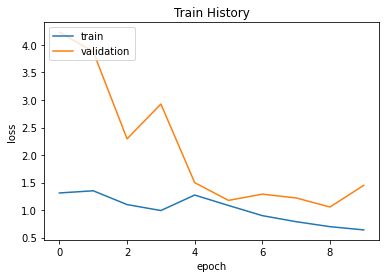

In [9]:
train_history(model_train,'loss','val_loss')

In [10]:
scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=2)

313/313 - 3s - loss: 1.4793 - accuracy: 0.5725


In [11]:
model.save('./Googlenet.h5', save_format="h5")